# < Rentention >

<br>

### - 30Days Rolling Retention 분석

<br>

### - Data
* 본 문서에서 사용하는 데이터는 UCI에서 제공하는 온라인 소매 상점 거래기록 데이터임.
    - 데이터 출처 : http://archive.ics.uci.edu/ml/datasets/Online+Retail/
    - 데이터 정보 : 2010.12.01 ~ 2011.12.09까지의 online retail shop의 고객 거래 데이터. 주 고객층은 도매업임.
    - 컬럼 정보 :
        * InvoiceNo : 거래식별 번호. 'c'로 시작할 경우 해당 거래는 "취소" 거래를 나타냄.
        * StockCode : 상품 식별 번호.
        * Description : 상품 배송지.
        * Quantity : 상품의 주문 개수.
        * InvoiceDate : 거래 발생 날짜.
        * UnitPrice : 상품의 개당 가격.
        * CustomerID : 고객 식별 번호.
        * Country : 고객의 국가정보.
        
<br>

### - 참고자료
* [`파이선 머신러닝 완벽 가이드`](https://book.naver.com/bookdb/book_detail.nhn?bid=16238302)
* [`첫걸음부터 실무까지 쉽게 배우는 데이터 분석`](https://taling.me/vod/play/849)

## < 라이브러리 Import & 데이터 Load >

In [1]:
## libarary import

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

sns.set()
%matplotlib inline

## 한글설정
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font', family='NanumGothic')
matplotlib.rc('axes', unicode_minus=False)
set_matplotlib_formats('retina')

# save origin
df_ori = pd.read_excel(io='C:/Users/KIHyuk/Desktop/dacon_data/CRM/UCI_Online_Retail/Online Retail.xlsx')

df = df_ori.copy()
df

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## < EDA & 결측값 처리 >

<br>

CoustomerID에 대한 전처리 진행. 고객식별번호가 결측값인 경우 의미없는 데이터이므로 제거해줌.

In [2]:
print("Customer ID row개수 , 결측치 개수 : ",len(df['CustomerID']) ,df['CustomerID'].isnull().sum())
df = df[df['CustomerID'].notnull()] # Coustomer ID 결측치 삭제
print("결측치 제거 후 Customer ID row개수 : ", len(df['CustomerID']))
print("Unique Customer ID : ", df['CustomerID'].nunique())

Customer ID row개수 , 결측치 개수 :  541909 135080
결측치 제거 후 Customer ID row개수 :  406829
Unique Customer ID :  4372


<br>

고객의 국가정보를 시각화. 89%의 고객이 영국(UK)에 거주하는것으로 나타남. 분석의 용이를 위해 영국에 거주하는 고객만을 대상으로 분석을 진행.

전체 국가 수 :  37
전체 국가중 United Kingdom 비율 :  0.8895088599878573


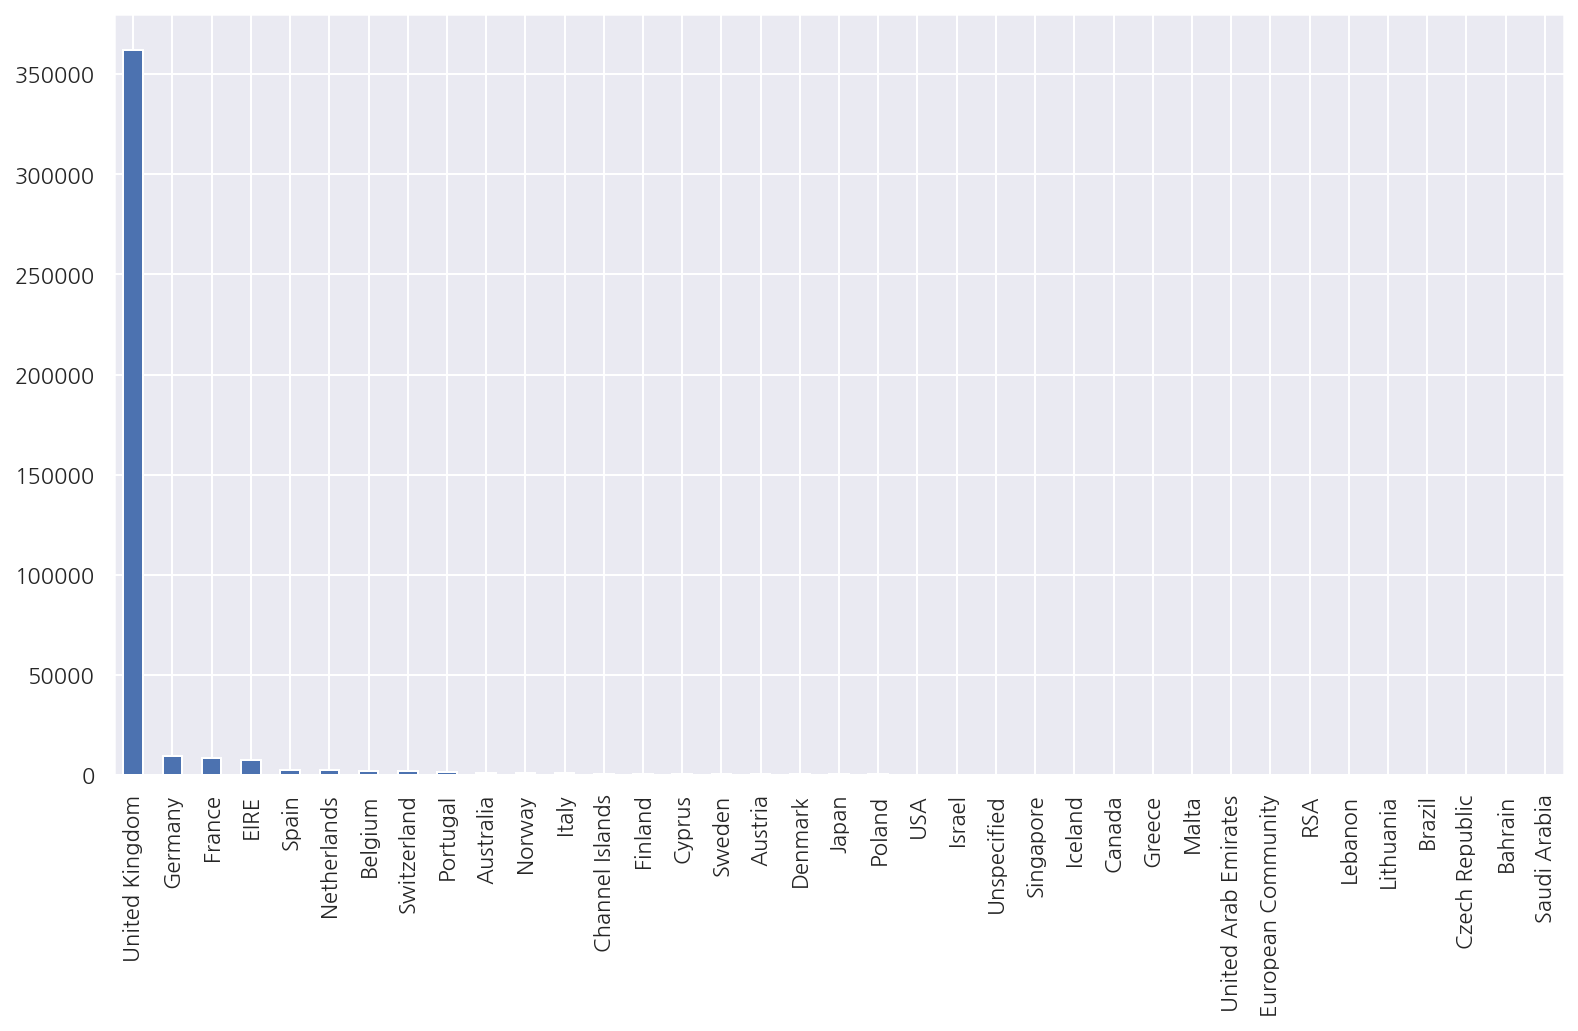

In [3]:
plt.figure(figsize=(13,7))
df['Country'].value_counts().plot(kind='bar')
print("전체 국가 수 : ", df['Country'].nunique())
print("전체 국가중 United Kingdom 비율 : ",len(df[df['Country']== 'United Kingdom'])/len(df))

# United Kingdom을 대상으로 진행
df = df[df['Country'] == 'United Kingdom']

<br>

상품 주문 개수와, 상품 가격이 -1인 경우가 존재함. 이는 거래취소,할인,환급인 경우로 추정되므로 제거해줌.

In [4]:
display(df['Quantity'].describe())
#  Quantity가 음수인 row 제외 
df = df[df['Quantity'] > 0]

print("#############################")

display(df.UnitPrice.describe())
#  Price가 음수인 row 제외 
df = df[df['UnitPrice'] > 0]

count    361878.000000
mean         11.077029
std         263.129266
min      -80995.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

#############################


count    354345.000000
mean          2.963793
std          17.862067
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

<br>

각 거래별 거래금액에 대한 정보 추가.

In [6]:
## 거래금액 col 추가
df['sale_amount'] = df['Quantity'] * df['UnitPrice']

In [38]:
first_purchase = pd.DataFrame()
recent_purchase = pd.DataFrame()

# 전체 고객수(Unique)
print("전체 고객수(중복제거) : ",df['CustomerID'].nunique())

# 1. 고객별 최초 구매일 구하기
first_purchase['CustomerID'] = df.groupby('CustomerID')['InvoiceDate'].min().index.astype('object')
first_purchase['최초 구매일'] = df.groupby('CustomerID')['InvoiceDate'].min().values
first_purchase['최초 구매일'] = first_purchase['최초 구매일'].dt.date 
display(first_purchase.head())

# 2. 고객별 가장 최근 구매일 구하기
recent_purchase['CustomerID'] = df.groupby('CustomerID')['InvoiceDate'].max().index.astype('object')
recent_purchase['최근 구매일'] = df.groupby('CustomerID')['InvoiceDate'].max().values
recent_purchase['최근 구매일'] = recent_purchase['최근 구매일'].dt.date 
display(recent_purchase.head())

전체 고객수(중복제거) :  3920


,CustomerID,최초 구매일
0,12346,2011-01-18
1,12747,2010-12-05
2,12748,2010-12-01
3,12749,2011-05-10
4,12820,2011-01-17


,CustomerID,최근 구매일
0,12346,2011-01-18
1,12747,2011-12-07
2,12748,2011-12-09
3,12749,2011-12-06
4,12820,2011-12-06


In [39]:
# 전체 데이터, 최초 구매일, 최근 구매일 병합
df = pd.merge(df,first_purchase,how='left')
df = pd.merge(df,recent_purchase,how='left')
display(df[['CustomerID','최초 구매일','최근 구매일']].head())

,CustomerID,최초 구매일,최근 구매일
0,17850,2010-12-01,2010-12-02
1,17850,2010-12-01,2010-12-02
2,17850,2010-12-01,2010-12-02
3,17850,2010-12-01,2010-12-02
4,17850,2010-12-01,2010-12-02


In [45]:
# 최초 구매일에서 최근 구매일까지의 기간 구하기
df['기간'] = df['최근 구매일'] - df['최초 구매일']
display(df[['CustomerID','최초 구매일','최근 구매일','기간']].head())

# 30Days Rolling Retention
def rolling_30(x):
    x = x.days
    if x >= 30 :
        return 1
    else :
        return 0

df['Rolling_Retention_30'] = df['기간'].apply(rolling_30)

print("전체 고객 수 : ",df['CustomerID'].nunique())
print("30Days Rolling Retention Customer : ",df[df['Rolling_Retention_30'] == 1]['CustomerID'].nunique())
print("전체 고객수 대비 30Days Rolling Retention Rate : ", df[df['Rolling_Retention_30'] == 1]['CustomerID'].nunique() / df['CustomerID'].nunique())

,CustomerID,최초 구매일,최근 구매일,기간
0,17850,2010-12-01,2010-12-02,1 days
1,17850,2010-12-01,2010-12-02,1 days
2,17850,2010-12-01,2010-12-02,1 days
3,17850,2010-12-01,2010-12-02,1 days
4,17850,2010-12-01,2010-12-02,1 days


전체 고객 수 :  3920
30Days Rolling Retention Customer :  2353
전체 고객수 대비 30Days Rolling Retention Rate :  0.6002551020408163
